<a href="https://colab.research.google.com/github/LiviuTofan/Sigmoid/blob/main/Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sigmoid First Exam**


## **Reading, analyzing, processing Data**


1. Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


2. Read the data from the csv file

In [ ]:
csv = '/content/Housing.csv'
data = pd.read_csv(csv)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


3. Check for missing values

In [ ]:
data.info()
if data.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
There are no missing values in the dataset.


4. Replace text to numeric data for ploting

In [ ]:
data = data.replace({'yes': 1, 'no': 0, 'furnished': 1, 'semi-furnished':0.5, 'unfurnished': 0})

# **Some basic plots of data for better understanding**

In [ ]:
def mainroad(data):
    plt.figure()
    mainroad_counts = data['mainroad'].value_counts()
    plt.pie(mainroad_counts, labels=mainroad_counts.index.astype(bool), autopct='%1.1f%%')
    plt.title('Connected to the main road')
    plt.show()

def guestroom(data):
    plt.figure()
    guestroom_counts = data['guestroom'].value_counts()
    plt.pie(guestroom_counts, labels=guestroom_counts.index.astype(bool), autopct='%1.1f%%')
    plt.title('Has a guest room')
    plt.show()

def basement(data):
    plt.figure()
    basement_counts = data['basement'].value_counts()
    plt.pie(basement_counts, labels=basement_counts.index.astype(bool), autopct='%1.1f%%')
    plt.title('Has a basement')
    plt.show()

def hot_water_heating(data):
    plt.figure()
    hot_water_heating_counts = data['hotwaterheating'].value_counts()
    plt.pie(hot_water_heating_counts, labels=hot_water_heating_counts.index.astype(bool), autopct='%1.1f%%')
    plt.title('Has hot water heating')
    plt.show()

def airconditioning(data):
    plt.figure()
    airconditioning_counts = data['airconditioning'].value_counts()
    plt.pie(airconditioning_counts, labels=airconditioning_counts.index.astype(bool), autopct='%1.1f%%')
    plt.title('Has air conditioning')
    plt.show()

def prefarea(data):
    plt.figure()
    prefarea_counts = data['prefarea'].value_counts()
    plt.pie(prefarea_counts, labels=prefarea_counts.index.astype(bool), autopct='%1.1f%%')
    plt.title('Preferred area')
    plt.show()

def furnishingstatus(data):
    plt.figure()
    furnishingstatus_counts = data['furnishingstatus'].value_counts()
    plt.pie(furnishingstatus_counts, labels=furnishingstatus_counts.index, autopct='%1.1f%%')
    plt.title('Furnishing status')
    plt.show()

def bedrooms(data):
    plt.figure()
    bedroom_counts = data['bedrooms'].value_counts()
    plt.bar(bedroom_counts.index, bedroom_counts)
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Count')
    plt.title('Number of Bedrooms')
    plt.show()

def bathrooms(data):
    plt.figure()
    bathroom_counts = data['bathrooms'].value_counts()
    plt.bar(bathroom_counts.index, bathroom_counts)
    plt.xlabel('Number of Bathrooms')
    plt.ylabel('Count')
    plt.title('Number of Bathrooms')
    plt.show()

def stories(data):
    plt.figure()
    stories_counts = data['stories'].value_counts()
    plt.bar(stories_counts.index, stories_counts)
    plt.xlabel('Number of Stories')
    plt.ylabel('Count')
    plt.title('Number of Stories')
    plt.show()

def parking(data):
    plt.figure()
    parking_counts = data['parking'].value_counts()
    plt.bar(parking_counts.index, parking_counts)
    plt.xlabel('Number of Parking Spaces')
    plt.ylabel('Count')
    plt.title('Number of Parking Spaces')
    plt.show()

def price(data):
    plt.figure()
    plt.hist(data['price'], bins=20)
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.title('Price')
    plt.show()

def area(data):
    plt.figure()
    plt.hist(data['area'], bins=20)
    plt.xlabel('Area')
    plt.ylabel('Count')
    plt.title('Area')
    plt.show()


Now below we will se result

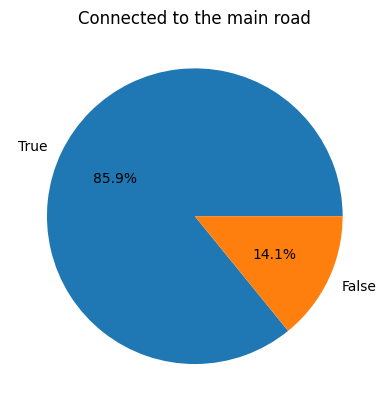

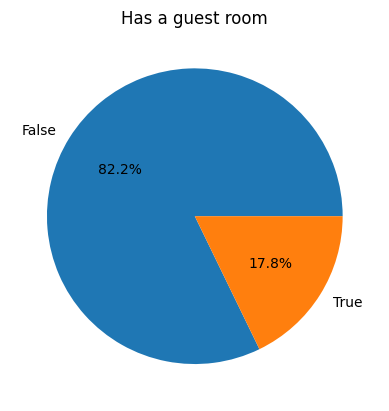

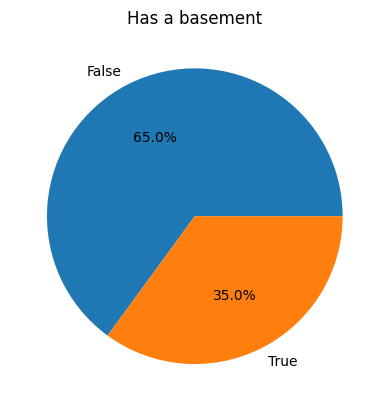

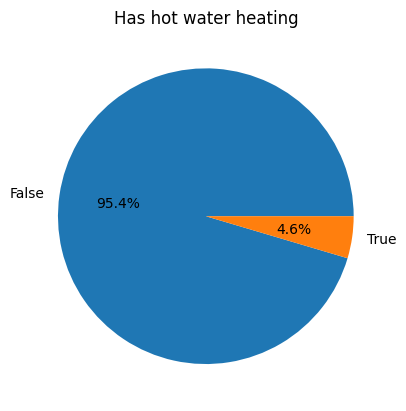

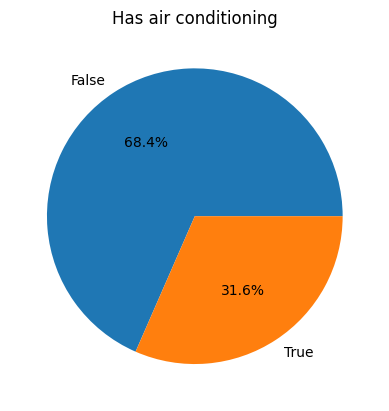

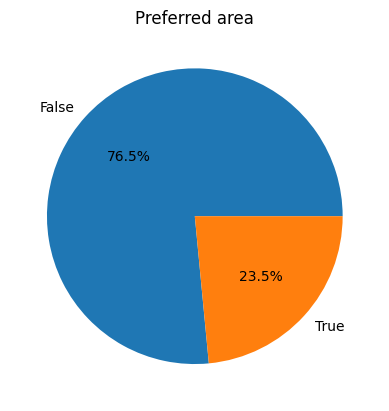

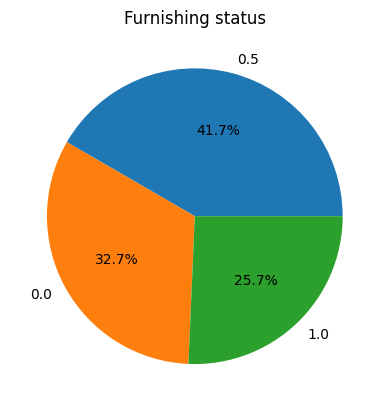

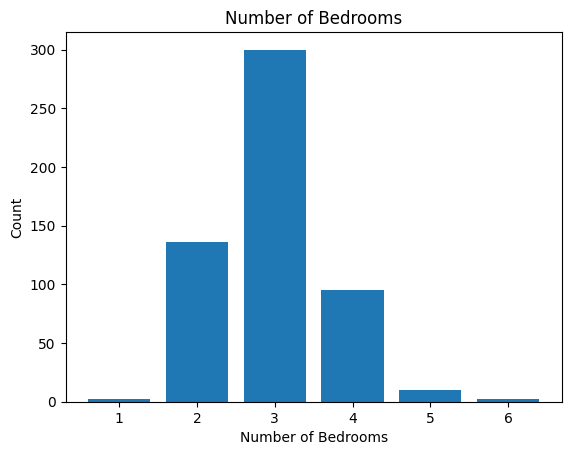

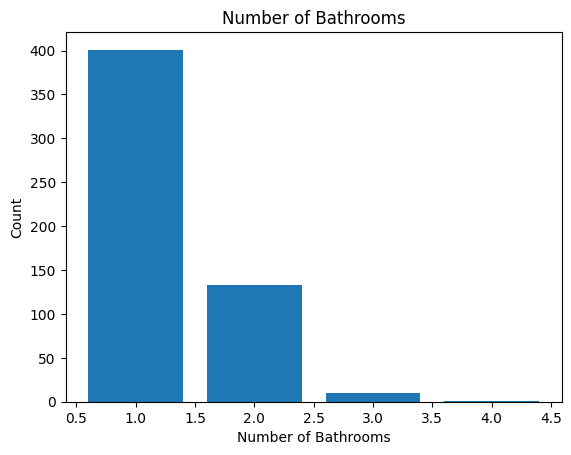

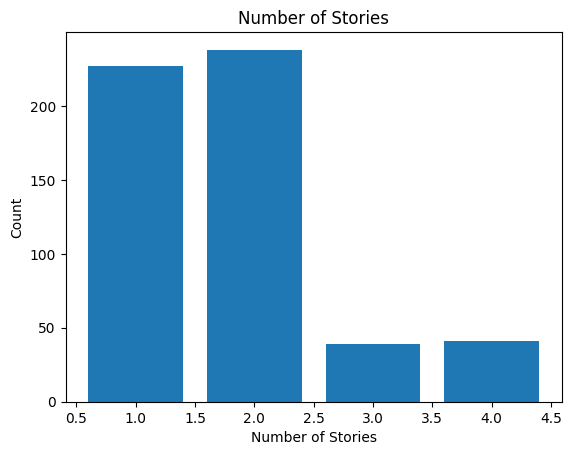

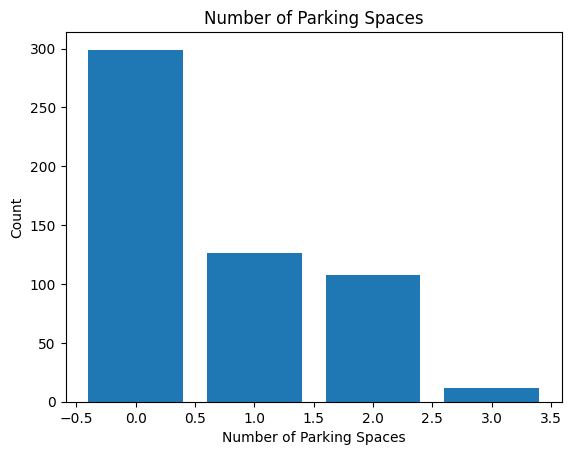

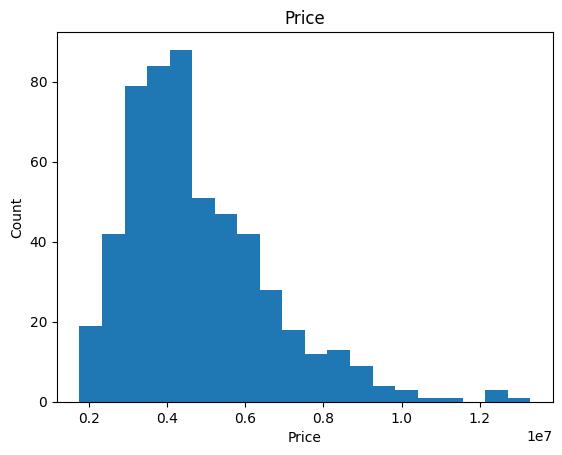

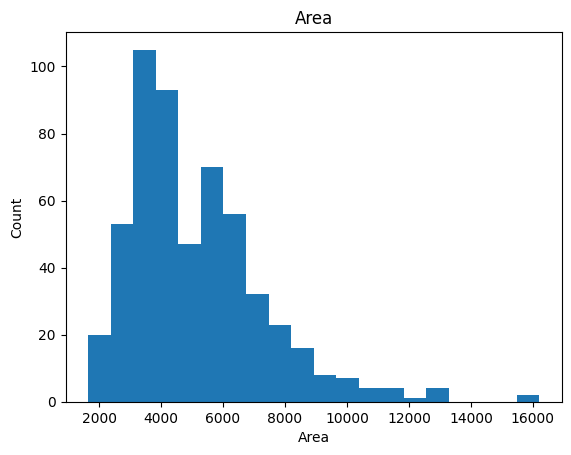

In [ ]:
def basic_statistics(data):
    mainroad(data)
    guestroom(data)
    basement(data)
    hot_water_heating(data)
    airconditioning(data)
    prefarea(data)
    furnishingstatus(data)
    bedrooms(data)
    bathrooms(data)
    stories(data)
    parking(data)
    price(data)
    area(data)

basic_statistics(data)

Below we will see more histograms plotting data

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

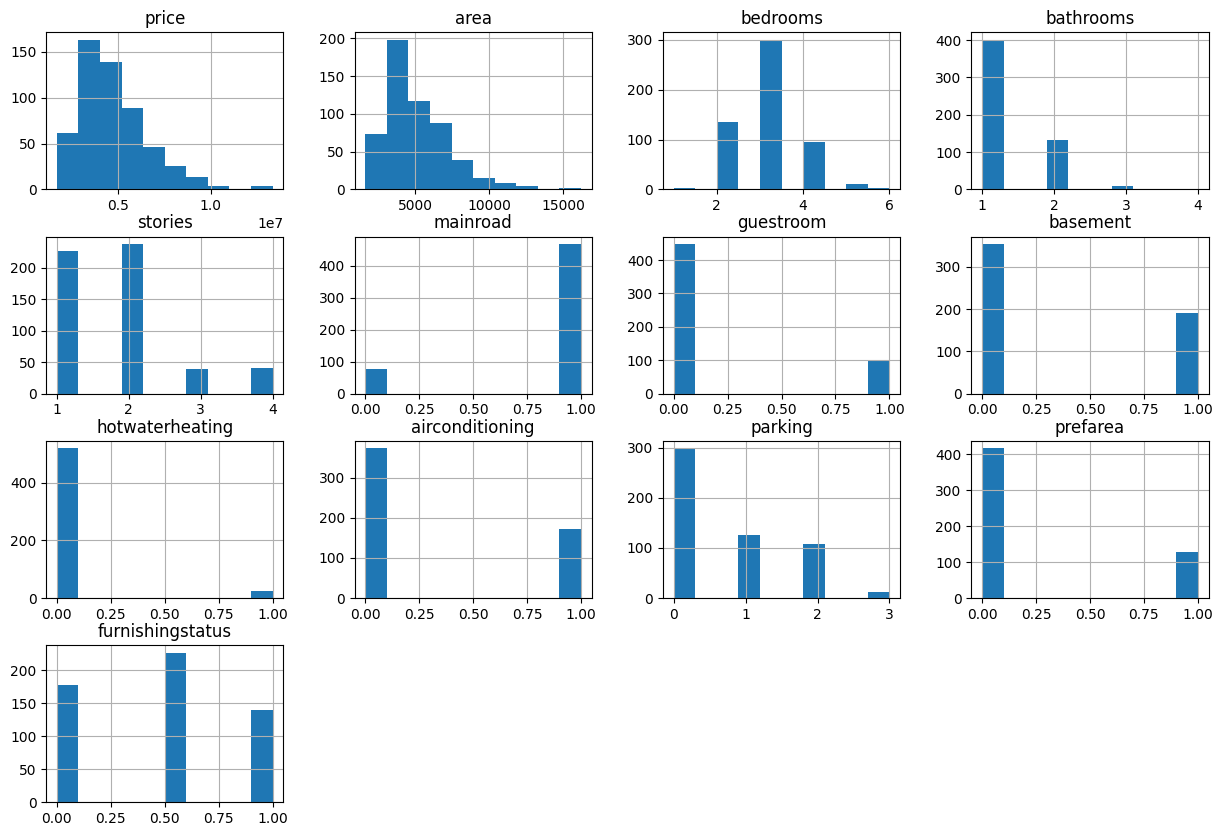

In [ ]:
data.hist(figsize=(15, 10))

Now we will see a Correlation Matrix for better understanding correlation between price and other criterias

<Axes: >

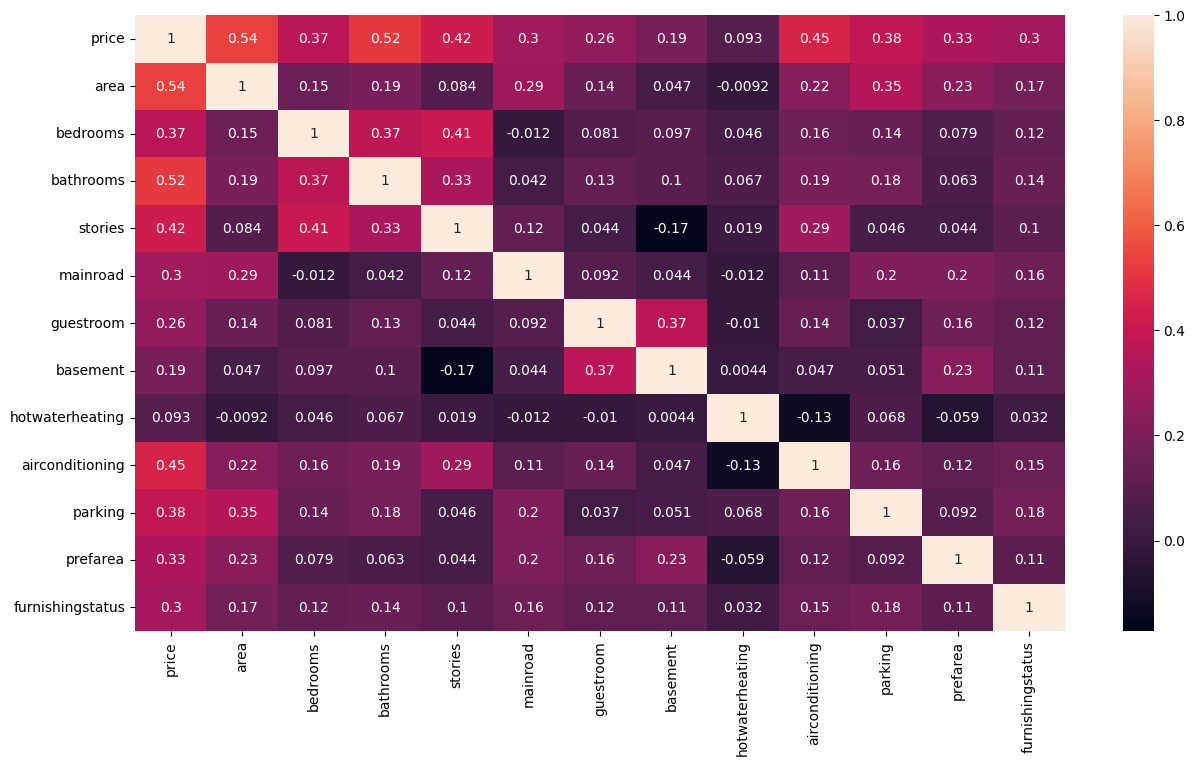

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)

From this Correlation Matrix we can observe that the most significant attribution to the price has the area and the bathrooms and the smallest attribution has the hotwaterheating.
so my hypothesis is that if we increase the surface area, or the number of bathrooms of the house, the price will also increase with a fairly large ratio.

# **Training ML Model**

1. Divide data (price / rest of data)


In [ ]:
x = data.drop(['price'], axis=1)
y = data['price']

2. Split data into: training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Joining the features and target into a single DataFrame for the training set
train_data = x_train.join(y_train)
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
46,6000,3,2,4,1,0,0,0,1,1,0,1.0,7525000
93,7200,3,2,1,1,0,1,0,1,3,0,0.5,6300000
335,3816,2,1,1,1,0,1,0,1,2,0,1.0,3920000
412,2610,3,1,2,1,0,1,0,0,0,1,0.0,3430000
471,3750,3,1,2,1,0,0,0,0,0,0,0.0,3010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,0.0,6755000
106,5450,4,2,1,1,0,1,0,1,0,1,0.5,6160000
270,4500,3,2,3,1,0,0,1,0,1,0,1.0,4340000
435,4040,2,1,1,1,0,0,0,0,0,0,0.0,3290000


## Creating Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
reg.score(x_test, y_test)

0.6494754192267802

The R^2 score of our trained model using Linear Regression is about 64.94% which is not such a good result for further predictions.
So let's try to scale the data and see if it will lead to better performance and a higher R² score for our Linear Regression model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
reg_scaled = LinearRegression()
reg_scaled.fit(x_train_scaled, y_train)

print("R² score after scaling:", reg_scaled.score(x_test_scaled, y_test))

R² score after scaling: 0.6494754192267794


After scaling the data our trained model using LR has the accuracy of 64.94% which is similar to previous R² score.

Now I want to predict some house prices, let's take the rows 1, 100, 200, 300, 400, 500 from our dataset. We will predict the price using first trained model and second scaled trained model, and also we are going to see the actual price of house to see the differnce between this 2 models.

In [ ]:
rows = [1, 100, 200, 300, 400, 500]
x_selected = x.iloc[rows]
x_scaled = scaler.fit_transform(x_selected)
y_actual = y.iloc[rows]

# Predict the price using LR and Scaled Data LR
y_pred_reg = reg.predict(x_selected)
y_pred_reg_scaled = reg_scaled.predict(x_scaled)

# Now let's see the difference
def compute_difference(y_pred_reg):
    print(f"{'Actual Price':<15} {'Predicted Price':<20} {'Difference':<15} {'Accuracy (%)':<15}")
    print("-" * 65)

    for price in range(len(y_actual)):
        actual = y_actual.iloc[price]
        predicted = y_pred_reg[price]
        difference = abs(actual - predicted)
        accuracy = (1 - difference / actual) * 100

        print(f"{actual:<15} {predicted:<20.2f} {difference:<15.2f} {accuracy:<15.2f}")

print("#First trained model on actual data#")
compute_difference(y_pred_reg)
print()
print("#Second trained model on scaled data#")
compute_difference(y_pred_reg_scaled)


#First trained model on actual data#
Actual Price    Predicted Price      Difference      Accuracy (%)   
-----------------------------------------------------------------
12250000        10563592.07          1686407.93      86.23          
6230000         6440508.11           210508.11       96.62          
4900000         4839544.02           60455.98        98.77          
4200000         3963047.52           236952.48       94.36          
3500000         3583561.50           83561.50        97.61          
2660000         2638553.49           21446.51        99.19          

#Second trained model on scaled data#
Actual Price    Predicted Price      Difference      Accuracy (%)   
-----------------------------------------------------------------
12250000        8298629.02           3951370.98      67.74          
6230000         5718783.21           511216.79       91.79          
4900000         4666119.79           233880.21       95.23          
4200000         3735293.79       

Below I will plot the results for better understanding

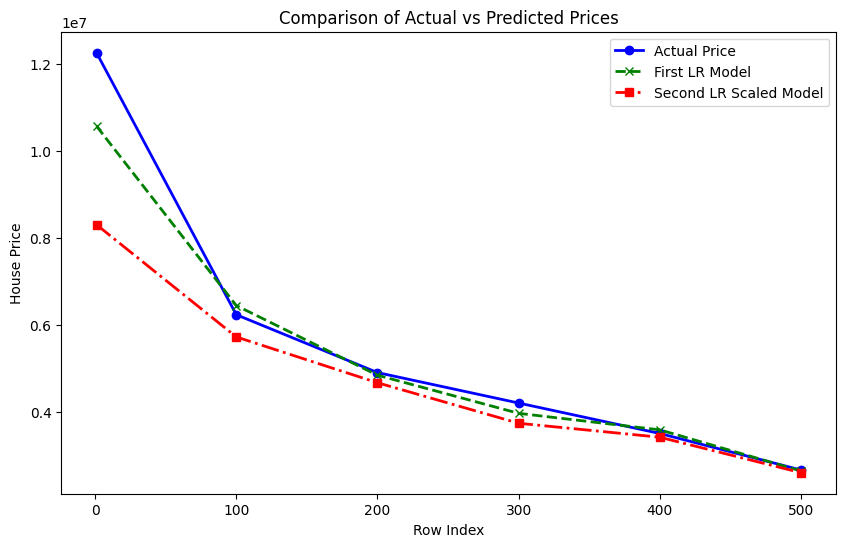

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(rows, y_actual, label='Actual Price', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(rows, y_pred_reg, label='First LR Model', color='green', marker='x', linestyle='--', linewidth=2)
plt.plot(rows, y_pred_reg_scaled, label='Second LR Scaled Model', color='red', marker='s', linestyle='-.', linewidth=2)

plt.xlabel('Row Index')
plt.ylabel('House Price')
plt.title('Comparison of Actual vs Predicted Prices')
plt.legend()

So we can observe even if R^2 score is similar, the scaled model returns worse results than first model. It seems that scaling the data disrupted the natural relationships between the features and the target (price), which led to worse predictions. So further we will work with first model without scaling the data.


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.6289313174013819

The R^2 score of our Random Forest trained model is 62.89% which also is not such a good result for further predictions.
Let's see the difference between Linear Regression and Random Forest

In [ ]:
y_pred_forest = forest.predict(x_selected)

print("#Linear Regression Model#")
compute_difference(y_pred_reg)
print()
print("#Random Forest Model#")
compute_difference(y_pred_forest )


#Linear Regression Model#
Actual Price    Predicted Price      Difference      Accuracy (%)   
-----------------------------------------------------------------
12250000        10563592.07          1686407.93      86.23          
6230000         6440508.11           210508.11       96.62          
4900000         4839544.02           60455.98        98.77          
4200000         3963047.52           236952.48       94.36          
3500000         3583561.50           83561.50        97.61          
2660000         2638553.49           21446.51        99.19          

#Random Forest Model#
Actual Price    Predicted Price      Difference      Accuracy (%)   
-----------------------------------------------------------------
12250000        11127509.40          1122490.60      90.84          
6230000         6649650.00           419650.00       93.26          
4900000         4724650.00           175350.00       96.42          
4200000         4146100.00           53900.00        98.72  

Below I will plot the results for better understanding

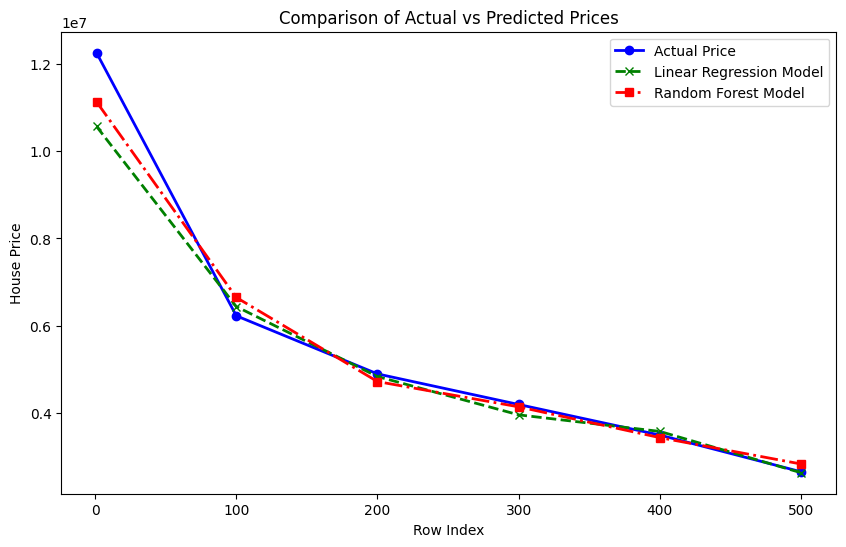

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(rows, y_actual, label='Actual Price', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(rows, y_pred_reg, label='Linear Regression Model', color='green', marker='x', linestyle='--', linewidth=2)
plt.plot(rows, y_pred_forest, label='Random Forest Model', color='red', marker='s', linestyle='-.', linewidth=2)

plt.xlabel('Row Index')
plt.ylabel('House Price')
plt.title('Comparison of Actual vs Predicted Prices')
plt.legend()

For better understanding I will do the same process but with all the data:

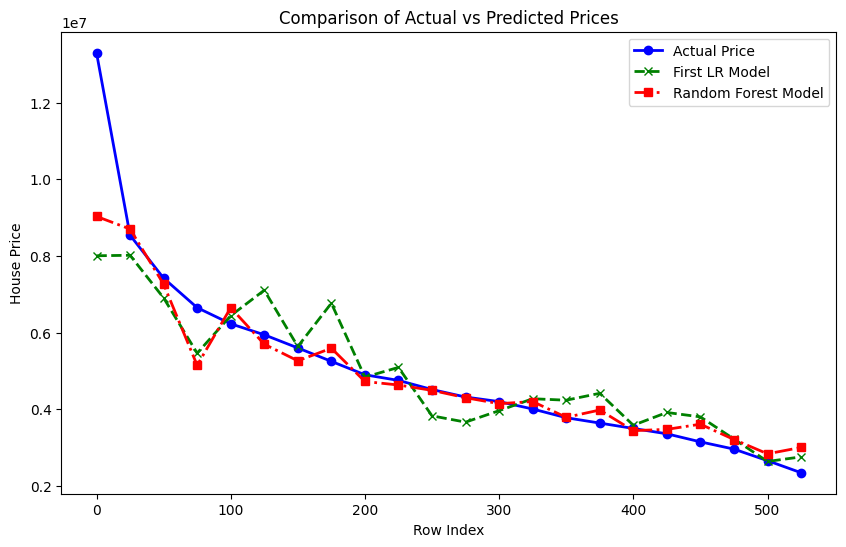

In [ ]:
rows = list(range(0, len(x), 25))
x_selected = x.iloc[rows]
y_actual = y.iloc[rows]
y_pred_reg = reg.predict(x_selected)
y_pred_forest = forest.predict(x_selected)

plt.figure(figsize=(10, 6))

plt.plot(rows, y_actual, label='Actual Price', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(rows, y_pred_reg, label='First LR Model', color='green', marker='x', linestyle='--', linewidth=2)
plt.plot(rows, y_pred_forest, label='Random Forest Model', color='red', marker='s', linestyle='-.', linewidth=2)

plt.xlabel('Row Index')
plt.ylabel('House Price')
plt.title('Comparison of Actual vs Predicted Prices')
plt.legend()

Now we can be sure that Random Forest Model has better predictions.
Furthermore for price predictions we will use RF Model and let's prove my hypothesis.
For this we will take some values from dataset, with the actual area and actual price after area will multiply by 10 and divide by 10 and see how price is modified.

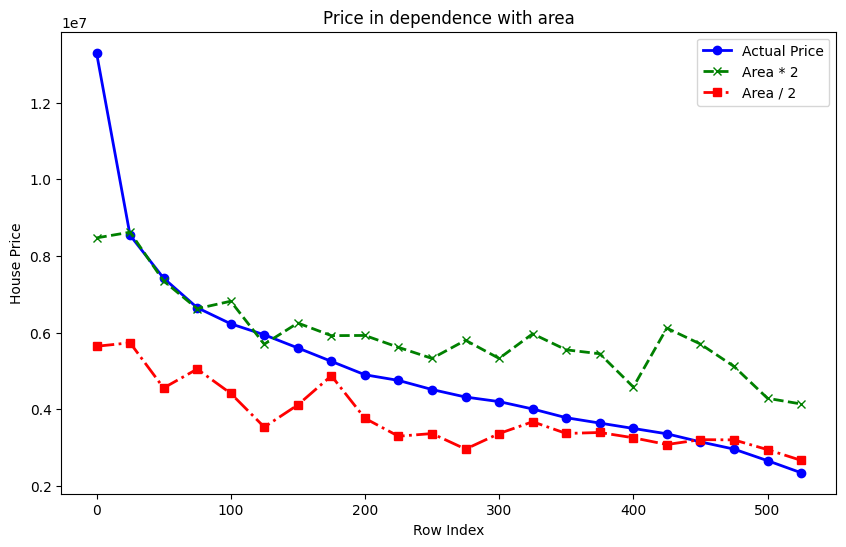

In [ ]:
x_selected_multiply = x_selected.copy()
x_selected_divide = x_selected.copy()

x_selected_multiply['area'] = x_selected_multiply['area'] * 10
x_selected_divide['area'] = x_selected_divide['area'] / 10

y_pred_forest_multiply = forest.predict(x_selected_multiply)
y_pred_forest_divide = forest.predict(x_selected_divide)

plt.figure(figsize=(10, 6))

plt.plot(rows, y_actual, label='Actual Price', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(rows, y_pred_forest_multiply, label='Area * 10', color='green', marker='x', linestyle='--', linewidth=2)
plt.plot(rows, y_pred_forest_divide, label='Area / 10', color='red', marker='s', linestyle='-.', linewidth=2)

plt.xlabel('Row Index')
plt.ylabel('House Price')
plt.title('Price in dependence with area')
plt.legend()


In conclusion, my hypothesis that adjusting the area would consistently predict higher or lower prices based solely on area modifications is not entirely accurate. The results demonstrate that the relationship between area and house prices is more nuanced and context-dependent.

- High Actual Prices: When the actual price of a house is high, adjusting the area (both multiplying and dividing) does not lead to the expected outcomes. In these cases, the predicted prices are below the actual prices for both modifications. This suggests that, in high-value scenarios, simply increasing the area does not correlate with a proportionate increase in value.

- Equal Predicted Price: There are instances where the predicted price remains the same with the actual area and the multiplied area, indicating a threshold effect where beyond a certain point, increasing area may not significantly impact price predictions. However, when the area is divided, the predicted price falls below the actual, reinforcing the idea that decreasing area can disproportionately lower perceived value.

- Mid-Range Prices: For houses with prices between the predicted values for multiplied and divided areas, the estimates align more closely with expectations. This suggests that in these scenarios, area modifications can reflect more accurately on the market value.

- Low Actual Prices: Lastly, when the actual price is below the estimated price for the divided area, it shows that there can be instances where reducing area can lead to overestimations in lower-valued properties, perhaps due to unique characteristics of certain houses that are not captured by area alone.

Overall, while the correlation between price and area is evident, as highlighted by the correlation matrix, it is clear that multiple factors influence the actual market prices. The relationship is not strictly linear, and adjustments to area must consider additional context such as market conditions, property features.





